In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
from dgfip.iris import get_iris
iris = get_iris()

In [44]:
iris['prop_age'] = iris['P17_POP6579'] / iris['P17_POP']

<AxesSubplot:xlabel='distance Centre de Finances publiques', ylabel='prop_age'>

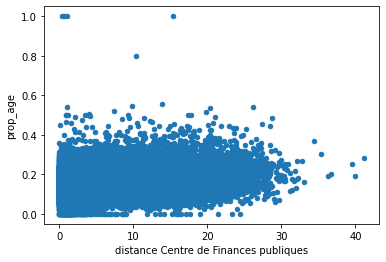

In [45]:
iris.plot.scatter(x='distance Centre de Finances publiques', y= 'prop_age')

In [12]:
sum(iris['P17_POP80P']*iris['distance Centre de Finances publiques'])/ sum(iris['P17_POP80P'])

4.261577663781926

In [13]:
sum(iris['P17_POP6579']*iris['distance Centre de Finances publiques'])/ sum(iris['P17_POP6579'])

4.338836241030143

In [14]:
sum(iris['P17_POP4054']*iris['distance Centre de Finances publiques'])/ sum(iris['P17_POP4054'])

4.09757903570835

In [15]:
sum(iris['P17_POP2539']*iris['distance Centre de Finances publiques'])/ sum(iris['P17_POP2539'])

3.61401110874756

<AxesSubplot:>

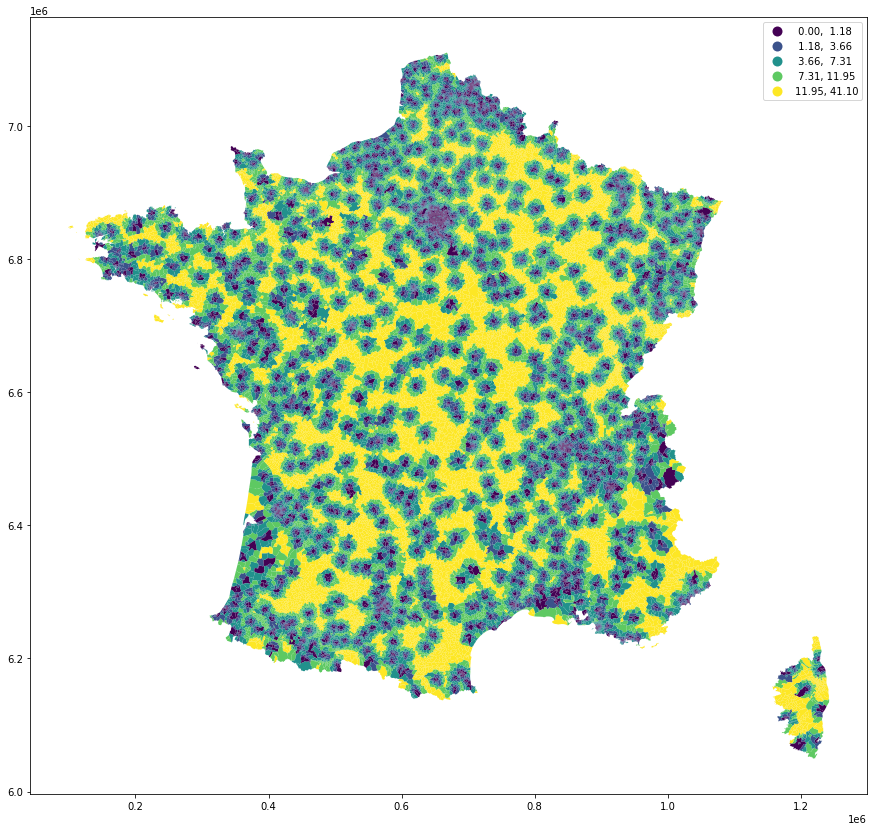

In [6]:
iris.plot(column='distance Centre de Finances publiques', figsize=(15,15), legend=True, scheme='Quantiles')

In [19]:
from dgfip.structures import get_structures
structures = get_structures()

In [67]:
bretagne_struct = structures[structures.DEPARTEMENT.isin({"22","29","35","56"}) & (structures['TYPE DE SERVICE'] == 'Centre de Finances publiques') & (structures.public=='professionnels')]

In [68]:
bretagne_struct.ADRESSE.nunique()

15

In [30]:
bretagne = gpd.read_file('https://github.com/gregoiredavid/france-geojson/raw/master/regions/bretagne/arrondissements-bretagne.geojson')

<AxesSubplot:>

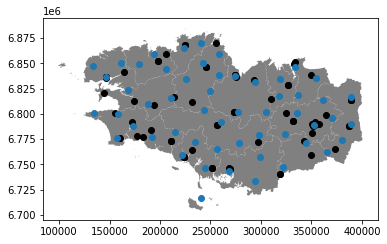

In [60]:
import numpy as np
from sklearn.cluster import KMeans,MiniBatchKMeans
from joblib import cpu_count
iris_bretagne = iris[iris['INSEE_COM'].str.slice(0,2).isin({'22', '29','35','56'})]
centroids_iris = iris_bretagne.centroid
points = np.array([centroids_iris.x, centroids_iris.y])

km = MiniBatchKMeans(n_clusters=54,  batch_size=256 * cpu_count(),
    n_init=10,
    max_no_improvement=10,)

km.fit(points.T, iris_bretagne.P17_POP.values)
geo = gpd.points_from_xy(*km.cluster_centers_.T)

ax = bretagne.to_crs('2154').plot(facecolor='grey')
bretagne_struct.to_crs("2154").plot(ax=ax, color='black')
gpd.GeoSeries(geo).plot(ax=ax)

<AxesSubplot:>

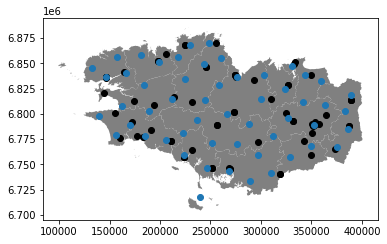

In [61]:
import numpy as np
from sklearn.cluster import KMeans,MiniBatchKMeans
from joblib import cpu_count
iris_bretagne = iris[iris['INSEE_COM'].str.slice(0,2).isin({'22', '29','35','56'})]
centroids_iris = iris_bretagne.centroid
points = np.array([centroids_iris.x, centroids_iris.y])

km = MiniBatchKMeans(n_clusters=54,  batch_size=256 * cpu_count(),
    n_init=10,
    max_no_improvement=10,)

km.fit(points.T, iris_bretagne.C17_POP15P_CS3.values)
geo = gpd.points_from_xy(*km.cluster_centers_.T)

ax = bretagne.to_crs('2154').plot(facecolor='grey')
bretagne_struct.to_crs("2154").plot(ax=ax, color='black')
gpd.GeoSeries(geo).plot(ax=ax)

<AxesSubplot:>

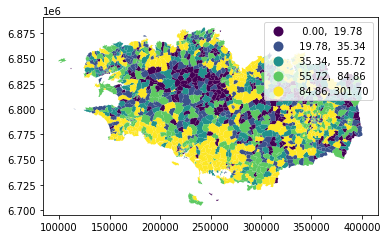

In [66]:
iris_bretagne.plot('C17_POP15P_CS2', scheme="Quantiles", legend=True)

<AxesSubplot:>

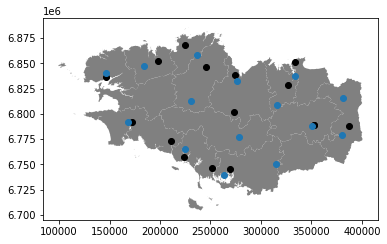

In [71]:
import numpy as np
from sklearn.cluster import KMeans,MiniBatchKMeans
from joblib import cpu_count
iris_bretagne = iris[iris['INSEE_COM'].str.slice(0,2).isin({'22', '29','35','56'})]
centroids_iris = iris_bretagne.centroid
points = np.array([centroids_iris.x, centroids_iris.y])

km = MiniBatchKMeans(n_clusters=15,  batch_size=10 * cpu_count(),
    n_init=30,
    max_no_improvement=10,)

km.fit(points.T, iris_bretagne.C17_POP15P_CS2.values)
geo = gpd.points_from_xy(*km.cluster_centers_.T)

ax = bretagne.to_crs('2154').plot(facecolor='grey')
bretagne_struct.to_crs("2154").plot(ax=ax, color='black')
gpd.GeoSeries(geo).plot(ax=ax)